In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.autograd import Variable

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


from math import sqrt


In [26]:
df=pd.read_csv('C:/Abdelouaheb/perso/Ph/time_series_analysis/data/Electric_Production.csv', index_col='DATE', parse_dates=True)

In [27]:
df.columns = ['value']
df.tail()


,value
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


<Axes: xlabel='DATE'>

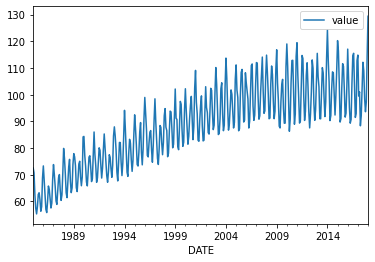

In [29]:
df.plot()

<Figure size 432x288 with 0 Axes>

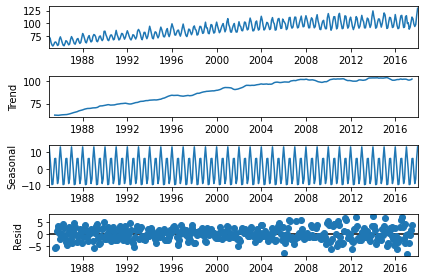

In [30]:
result = seasonal_decompose(df)

fig = plt.figure()  
fig = result.plot()
plt.show()

In [31]:
result=adfuller(df.value.dropna())
print(f'ADF Statistics:{result[0]}')
print(f'p-value:{result[1]}')


ADF Statistics:-2.25699035004725
p-value:0.18621469116586592


In [32]:
result=adfuller(df.value.diff().dropna())
print(f'ADF Statistics:{result[0]}')
print(f'p-value:{result[1]}')


ADF Statistics:-7.104890882267312
p-value:4.0777865655394095e-10


c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


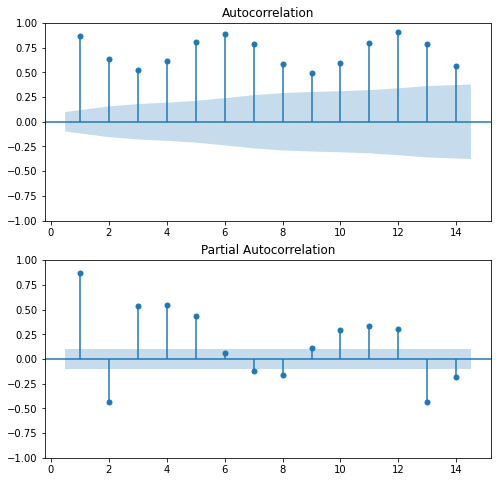

In [33]:
fig, (ax1, ax2)=plt.subplots(2,1,figsize=(8,8))

plot_acf(df,lags=14, zero=False, ax=ax1)
plot_pacf(df,lags=14, zero=False, ax=ax2)
plt.show()

In [34]:

import pmdarima as pm

In [49]:
results_arima=pm.auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=False, m=6, D=1, start_P=1, start_Q=1, max_P=2, max_Q=2, information_criterion='aic', trace=True, error_action='ignore', stepwise=True)

c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (6) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2460.378, Time=0.11 sec

Best model:  ARIMA(1,1,3)(0,0,0)[0] intercept
Total fit time: 1.904 seconds


In [52]:
model_arima=SARIMAX(df,order=(1,1,3))
results_arima=model_arima.fit()

c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [53]:
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  397
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -1225.189
Date:                Mon, 05 Feb 2024   AIC                           2460.378
Time:                        13:39:02   BIC                           2480.285
Sample:                    01-01-1985   HQIC                          2468.264
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1226      0.096      1.279      0.201      -0.065       0.311
ma.L1          0.0699      0.072      0.974      0.330      -0.071       0.211
ma.L2         -0.4631      0.043    -10.770      0.000      -0.547      -0.379
ma.L3         -0.4799      0.055     -8.647      0.000      -0.589      -0.371
sigma2        28.3739      2.007     14.137      0.000      24.440      32.308
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.84
Prob(Q):                              0.82   Prob(JB):                         0.24
Heteroskedasticity (H):               2.62   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

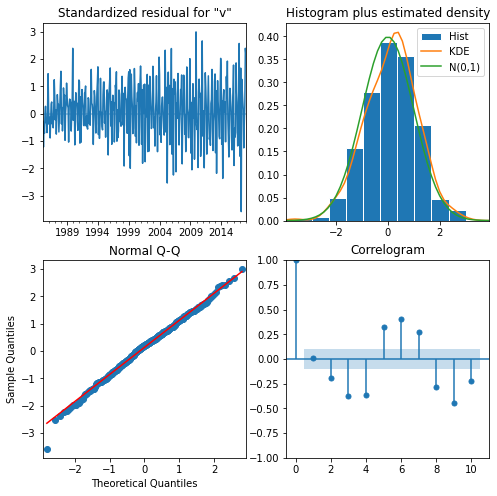

In [54]:
# Create the 4 diagostics plots
results_arima.plot_diagnostics(figsize=(8,8))
plt.show()

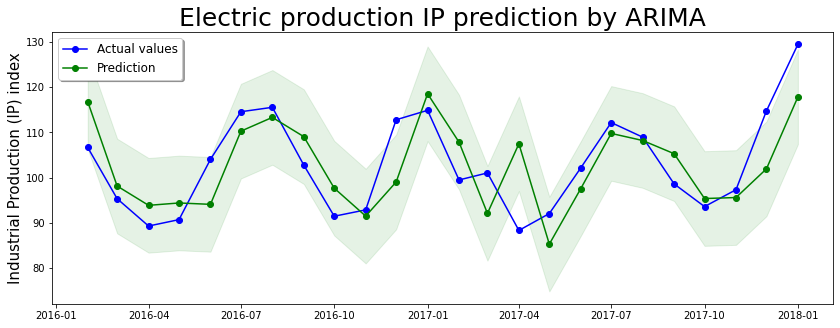

In [68]:
prediction_arima = results_arima.get_prediction(start=-24)
mean_prediction_arima=prediction_arima.predicted_mean
mean_prediction = mean_prediction_arima.rename("prediction")
confi_int_p_arima=prediction_arima.conf_int()
lower_limits_p_arima=confi_int_p_arima.iloc[:,0]
upper_limits_p_arima=confi_int_p_arima.iloc[:,1]
plt.figure(figsize=(14,5))
plt.title("Electric production IP prediction by ARIMA", fontsize=25)

plt.plot(df[-24:].index,df[-24:].values, label='Actual values', color="blue", marker="o")

plt.plot(mean_prediction_arima[-24:].index, mean_prediction_arima[-24:].values,label='Prediction', color="green", marker="o")
plt.fill_between(mean_prediction_arima[-24:].index, lower_limits_p_arima, upper_limits_p_arima, alpha=0.1, color="green")

plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Industrial Production (IP) index', fontsize=15)
plt.show()

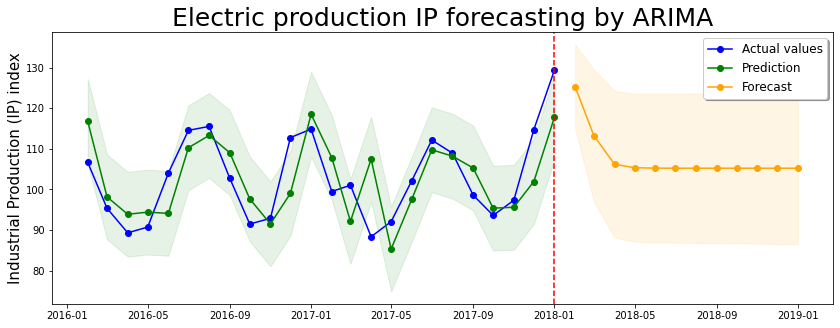

In [69]:
df_pred=df.iloc[-24:]
# Make ARIMA forecast of next 10 values
forecast_arima = results_arima.get_forecast(steps=12)
mean_forecast_arima=forecast_arima.predicted_mean
mean_forecast_arima = mean_forecast_arima.rename("prediction")
confi_int_f_arima=forecast_arima.conf_int()
lower_limits_f_arima=confi_int_f_arima.iloc[:,0]
upper_limits_f_arima=confi_int_f_arima.iloc[:,1]
plt.figure(figsize=(14,5))
plt.title("Electric production IP forecasting by ARIMA", fontsize=25)

plt.plot(df[-24:].index,df[-24:].values, label='Actual values', color="blue", marker="o")

plt.plot(mean_prediction[-24:].index, mean_prediction[-24:].values,label='Prediction', color="green", marker="o")
plt.fill_between(mean_prediction[-24:].index, lower_limits_p_arima, upper_limits_p_arima, alpha=0.1, color="green")

plt.plot(mean_forecast_arima[-24:].index,mean_forecast_arima[-24:].values, label='Forecast', color="orange", marker="o")
plt.fill_between(mean_forecast_arima[-24:].index, lower_limits_f_arima, upper_limits_f_arima, alpha=0.1, color="orange")

plt.axvline(df_pred.iloc[-24:].index[-1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Industrial Production (IP) index', fontsize=15)
plt.show()

In [73]:
df_arima = pd.concat([mean_prediction_arima, mean_forecast_arima])

In [129]:
results_sarimax=pm.auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True, m=6, D=1, start_P=1, start_Q=1, max_P=2, max_Q=2, information_criterion='aic', trace=True, error_action='ignore', stepwise=True,trend='ct')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1944.867, Time=1.06 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2408.421, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2002.552, Time=0.77 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=1951.993, Time=0.98 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1934.680, Time=2.31 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=1962.567, Time=1.50 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=1985.255, Time=1.40 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1977.734, Time=1.19 sec
 ARIMA(0,1,1)(2,1,1)[6]             : AIC=1950.174, Time=1.66 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=1947.491, Time=1.54 sec
 ARIMA(2,1,1)(2,1,1)[6]             : AIC=1945.828, Time=2.16 sec
 ARIMA(1,1,2)(2,1,1)[6]             : AIC=1961.030, Time=1.66 sec
 ARIMA(0,1,0)(2,1,1)[6]             : AIC=1

In [154]:
model_sarimax=SARIMAX(df,order=(2,1,2),  seasonal_order=(1, 1, 2, 6))
results_sarimax=model_sarimax.fit()

c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starti

In [144]:
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             value   No. Observations:                  397
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -925.834
Date:                           Mon, 05 Feb 2024   AIC                           1871.669
Time:                                   14:18:43   BIC                           1911.330
Sample:                               01-01-1985   HQIC                          1887.391
                                    - 01-01-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0729      0.058      1.255      0.210      -0.041       0.187
drift         -0.0003      0.000     -1.289      0.198      -0.001       0.000
ar.L1         -0.1790      0.229     -0.783      0.434      -0.627       0.269
ar.L2          0.0721      0.155      0.466      0.641      -0.231       0.376
ma.L1         -0.1616      0.223     -0.725      0.469      -0.598       0.275
ma.L2         -0.4441      0.206     -2.153      0.031      -0.848      -0.040
ar.S.L6       -0.9323      0.024    -38.584      0.000      -0.980      -0.885
ma.S.L6       -0.0968      0.066     -1.456      0.145      -0.227       0.033
ma.S.L12      -0.5462      0.055     -9.949      0.000      -0.654      -0.439
sigma2         6.4607      0.386     16.719      0.000       5.703       7.218
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                26.11
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

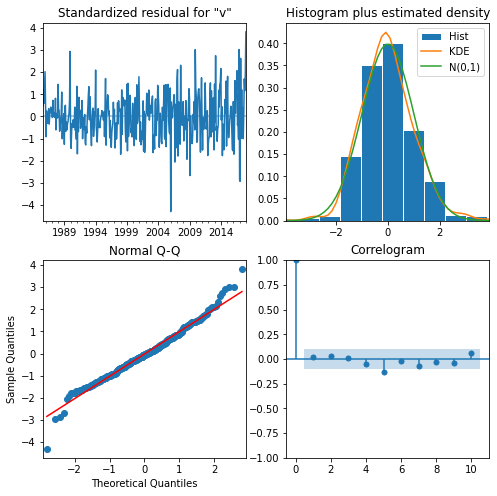

In [145]:
# Create the 4 diagostics plots
results_sarimax.plot_diagnostics(figsize=(8,8))
plt.show()

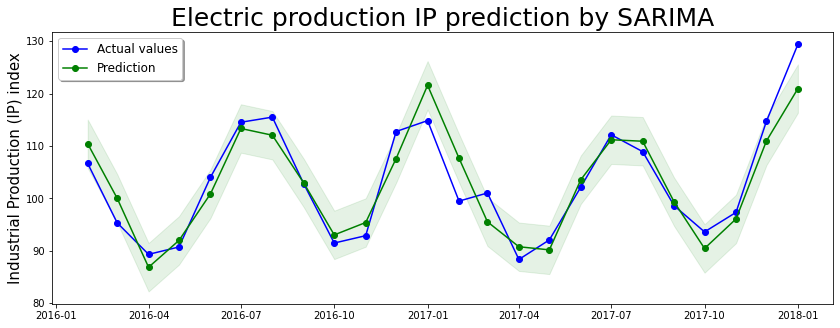

In [155]:
prediction = results_sarimax.get_prediction(start=-24)
mean_prediction=prediction.predicted_mean
mean_prediction = mean_prediction.rename("prediction")
confi_int_p=prediction.conf_int()
lower_limits_p=confi_int_p.iloc[:,0]
upper_limits_p=confi_int_p.iloc[:,1]
plt.figure(figsize=(14,5))
plt.title("Electric production IP prediction by SARIMA", fontsize=25)

plt.plot(df[-24:].index,df[-24:].values, label='Actual values', color="blue", marker="o")

plt.plot(mean_prediction[-24:].index, mean_prediction[-24:].values,label='Prediction', color="green", marker="o")
plt.fill_between(mean_prediction[-24:].index, lower_limits_p, upper_limits_p, alpha=0.1, color="green")

plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Industrial Production (IP) index', fontsize=15)
plt.show()

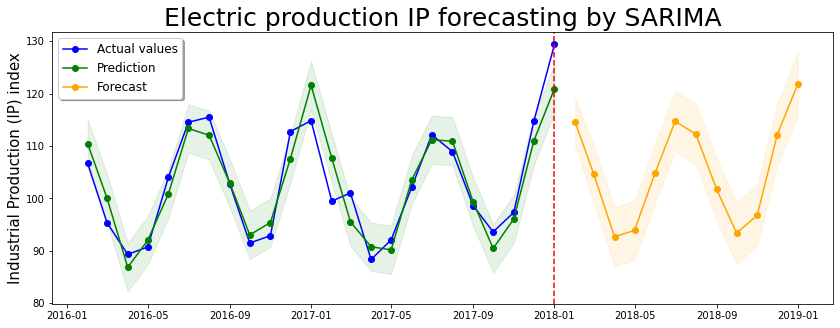

In [156]:
df_pred=df.iloc[-24:]
# Make ARIMA forecast of next 10 values
forecast = results_sarimax.get_forecast(steps=12)
mean_forecast=forecast.predicted_mean
mean_forecast = mean_forecast.rename("prediction")
confi_int_f=forecast.conf_int()
lower_limits_f=confi_int_f.iloc[:,0]
upper_limits_f=confi_int_f.iloc[:,1]
plt.figure(figsize=(14,5))
plt.title("Electric production IP forecasting by SARIMA", fontsize=25)

plt.plot(df[-24:].index,df[-24:].values, label='Actual values', color="blue", marker="o")

plt.plot(mean_prediction[-24:].index, mean_prediction[-24:].values,label='Prediction', color="green", marker="o")
plt.fill_between(mean_prediction[-24:].index, lower_limits_p, upper_limits_p, alpha=0.1, color="green")

plt.plot(mean_forecast[-24:].index,mean_forecast[-24:].values, label='Forecast', color="orange", marker="o")
plt.fill_between(mean_forecast[-24:].index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(df_pred.iloc[-24:].index[-1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Industrial Production (IP) index', fontsize=15)
plt.show()

In [136]:
rmse_arima = sqrt(mean_squared_error(df[-24:].values,mean_prediction_arima.values))
print(f"RMSE OF SARIMA MODEL : {rmse_arima:.2f}")

RMSE OF SARIMA MODEL : 7.86


In [157]:
rmse_sarima = sqrt(mean_squared_error(df[-24:].values,mean_prediction.values))
print(f"RMSE OF SARIMA MODEL : {rmse_sarima:.2f}")

RMSE OF SARIMA MODEL : 3.87


In [80]:
df_sarimax  = pd.concat([mean_prediction, mean_forecast])

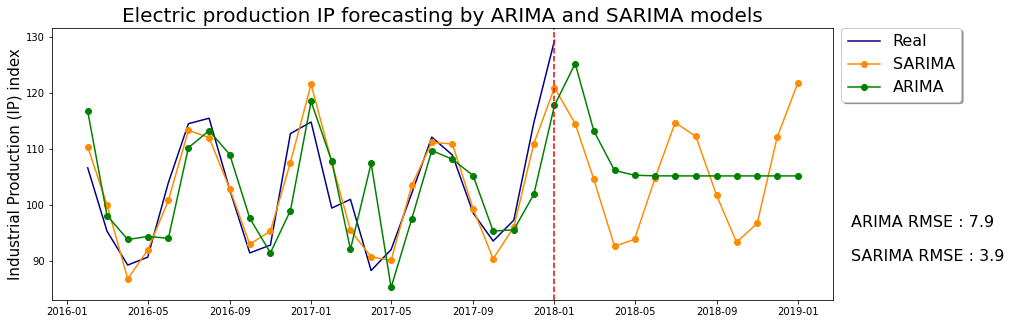

In [94]:
plt.figure(figsize=(14,5))
plt.title("Electric production IP forecasting by ARIMA and SARIMA models", fontsize=20)
plt.plot(df[-24:].index,df[-24:].values, color='darkblue', label='Real')
plt.plot(df_sarimax.index, df_sarimax.values, color='darkorange', label='SARIMA', marker='o')
plt.plot(df_arima.index, df_arima.values, color='green',label='ARIMA', marker='o')
plt.axvline(df_pred.index[-1], color="red", linestyle="--")
plt.legend(bbox_to_anchor=(1, 1.03),fontsize=16,fancybox=True, shadow=True, frameon=True)
text = 'ARIMA RMSE : {:.1f}\n\nSARIMA RMSE : {:.1f} '.format(rmse_arima,rmse_sarima)
plt.text(mean_forecast.index[-1] + pd.DateOffset(days=80),90,text, fontsize=16)
plt.ylabel('Industrial Production (IP) index', fontsize=15)
plt.show()

In [160]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(df['value'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
new= model_fit.forecast(24)

c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [162]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(df['value']),trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.5, smoothing_slope=0.01, optimized=False)
print(model_fit.params)

new= model_fit.forecast(24)

{'smoothing_level': 0.5, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 68.39752666666662, 'initial_trend': -1.1764048484848448, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_19780\3650223120.py:3: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=0.5, smoothing_slope=0.01, optimized=False)


In [164]:
smooth = pd.DataFrame(new, columns=['Column_Name'])